Project Overview:
 Got some contract work with an Ecommerce company based in New York City that sells clothing online but they also have in-store style and clothing advice sessions.
Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.

The company is trying to decide whether to focus their efforts on their mobile app experience or their website. They've hired you on contract to help them figure it out! Let's get started!

Just follow the steps below to analyze the customer data 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
%matplotlib inline

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [44]:
from sklearn import metrics

In [45]:
## Read the E-commerce data from CSV file into data Frame as name cust_df
cust_df=pd.read_csv('Ecommerce Customers')

In [46]:
##check 10 sample data
cust_df.head(10)

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092
5,alvareznancy@lucas.biz,"645 Martha Park Apt. 611\nJeffreychester, MN 6...",FloralWhite,33.871038,12.026925,34.476878,5.493507,637.102448
6,katherine20@yahoo.com,"68388 Reyes Lights Suite 692\nJosephbury, WV 9...",DarkSlateBlue,32.021596,11.366348,36.683776,4.685017,521.572175
7,awatkins@yahoo.com,Unit 6538 Box 8980\nDPO AP 09026-4941,Aqua,32.739143,12.351959,37.373359,4.434273,549.904146
8,vchurch@walter-martinez.com,"860 Lee Key\nWest Debra, SD 97450-0495",Salmon,33.987773,13.386235,37.534497,3.273434,570.200409
9,bonnie69@lin.biz,"PSC 2734, Box 5255\nAPO AA 98456-7482",Brown,31.936549,11.814128,37.145168,3.202806,427.199385


In [15]:
cust_df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [17]:
## get numbers rows and columns
cust_df.shape

(500, 8)

In [18]:
## get the datatypes of each column
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [19]:
## Get the statistcs of data
cust_df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


Exploratory data analysis





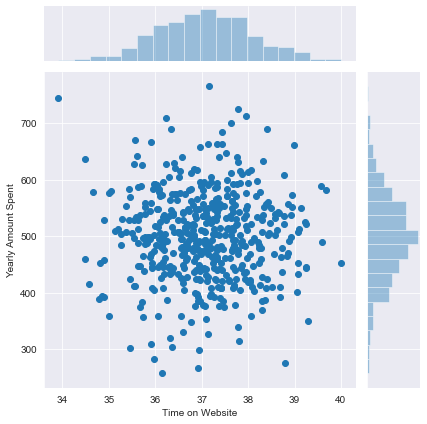

In [20]:
## Create a joint plot to compare the time on website and yearly amount spent columns.its scatter joint plot. 
##looks like there is no correlation between them
sns.set_style('darkgrid')
sns.jointplot(data=cust_df,x='Time on Website',y='Yearly Amount Spent')

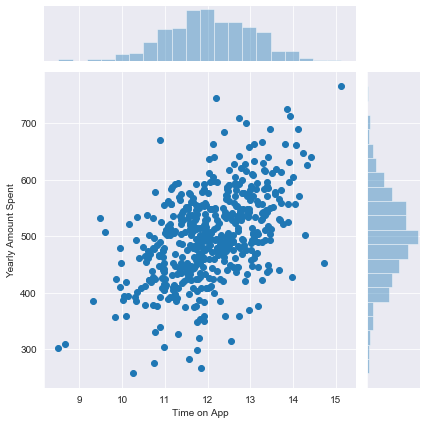

In [21]:
## Lets plot joint plot with scatter between Time on App and Yearly Amount Spent
## Looks like better corelation this time
sns.jointplot(data=cust_df,x='Time on App',y='Yearly Amount Spent')

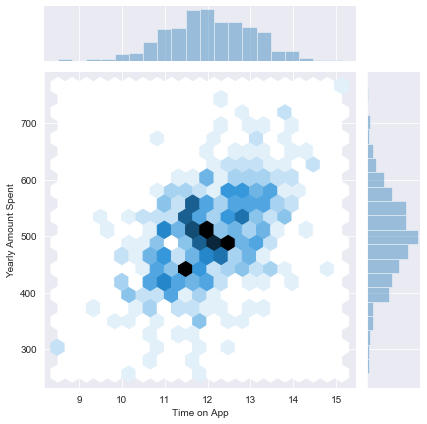

In [22]:
## Use joint plot to create 2D hex bin plot comparing time on app and lenght of membership
sns.jointplot(data=cust_df,x='Time on App',y='Yearly Amount Spent',kind='hex')

Lets explore the relationship acorss entire dataset using pairplot


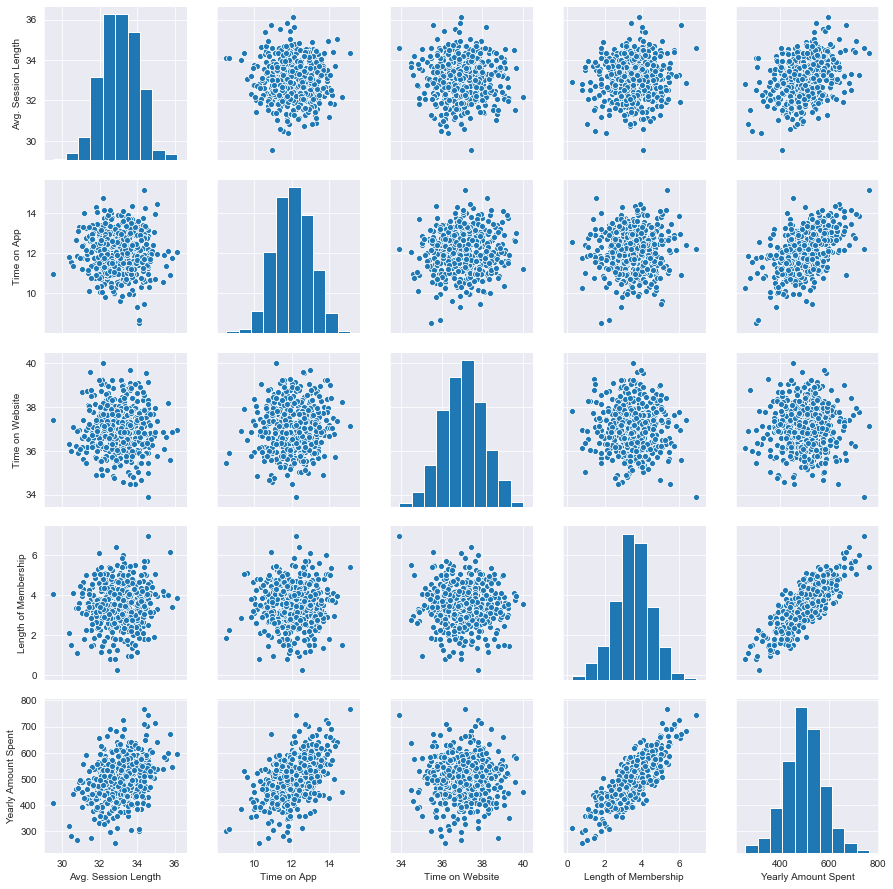

In [23]:
sns.pairplot(cust_df)

## looks like there is higher co relation between yearly amount spent and lenght of memeber ship

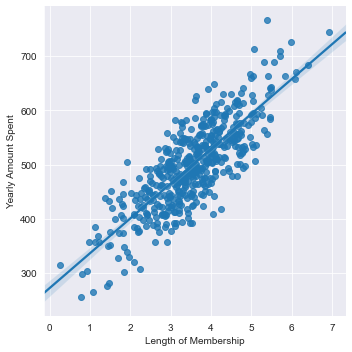

In [25]:
## Create a liner model plot of yearly amount spent vs lenght of memebership
sns.lmplot(x='Length of Membership',y='Yearly Amount Spent',data=cust_df)

START Linear regression on this issue.y=Yearly Amount Spent and X=rest of all numerical columns
split dataset into training and testdata

In [26]:
## Columns list
cust_df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [27]:
## Set the X axes and y axes
y=cust_df['Yearly Amount Spent']
X=cust_df[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]

In [29]:
y.head(20)

0     587.951054
1     392.204933
2     487.547505
3     581.852344
4     599.406092
5     637.102448
6     521.572175
7     549.904146
8     570.200409
9     427.199385
10    492.606013
11    522.337405
12    408.640351
13    573.415867
14    470.452733
15    461.780742
16    457.847696
17    407.704548
18    452.315675
19    605.061039
Name: Yearly Amount Spent, dtype: float64

In [28]:
X.head(20)

,Avg. Session Length,Time on App,Time on Website,Length of Membership
0,34.497268,12.655651,39.577668,4.082621
1,31.926272,11.109461,37.268959,2.664034
2,33.000915,11.330278,37.110597,4.104543
3,34.305557,13.717514,36.721283,3.120179
4,33.330673,12.795189,37.536653,4.446308
5,33.871038,12.026925,34.476878,5.493507
6,32.021596,11.366348,36.683776,4.685017
7,32.739143,12.351959,37.373359,4.434273
8,33.987773,13.386235,37.534497,3.273434
9,31.936549,11.814128,37.145168,3.202806


In [30]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)

In [31]:
X_train.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership
202,31.525752,11.340036,37.039514,3.811248
428,31.862741,14.039867,37.022269,3.738225
392,33.258238,11.514949,37.128039,4.662845
86,33.877779,12.517666,37.151921,2.669942
443,33.025020,12.504220,37.645839,4.051382


In [32]:
X_test.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership
18,32.187812,14.715388,38.244115,1.516576
361,32.077590,10.347877,39.045156,3.434560
104,31.389585,10.994224,38.074452,3.428860
4,33.330673,12.795189,37.536653,4.446308
156,32.294642,12.443048,37.327848,5.084861


In [34]:
y_train.head()

202    443.965627
428    556.298141
392    549.131573
86     487.379306
443    561.516532
Name: Yearly Amount Spent, dtype: float64

In [35]:
y_test.head()

18     452.315675
361    401.033135
104    410.069611
4      599.406092
156    586.155870
Name: Yearly Amount Spent, dtype: float64

In [36]:
## Create object on liner regression
ln=LinearRegression()

In [37]:
## Train the model
ln.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [38]:
## Get the coeffciet
ln.coef_

array([25.98154972, 38.59015875,  0.19040528, 61.27909654])

In [39]:
## get the intercept value
ln.intercept_

-1047.9327822502382

In [40]:
## predict the model using X_test data
predictions=ln.predict(X_test)

Text(0, 0.5, 'Predicted Value')

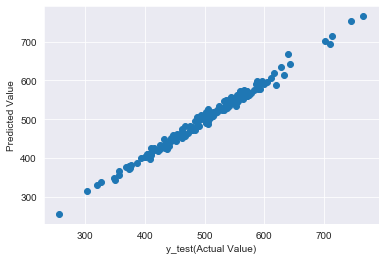

In [41]:
## Lets plot the scatter plot between actual value(y_test) and predictions value
plt.scatter(y_test,predictions)
plt.xlabel('y_test(Actual Value)')
plt.ylabel('Predicted Value')

Evaluaion Metrics

In [49]:
print('Mean Absolute Error(MAE): ',metrics.mean_absolute_error(y_test,predictions))
print('Mean Square Error(MSE): ',metrics.mean_squared_error(y_test,predictions))
print('Root Mean Square Error(MAE): ',np.sqrt(metrics.mean_absolute_error(y_test,predictions)))

Mean Absolute Error(MAE):  7.228148653430835
Mean Square Error(MSE):  79.81305165097467
Root Mean Square Error(MAE):  2.6885216483098726


In [50]:
## Explained varience score. close to 1.0 is best score for metrics evaluation 
metrics.explained_variance_score(y_test,predictions)

0.9890771231889607

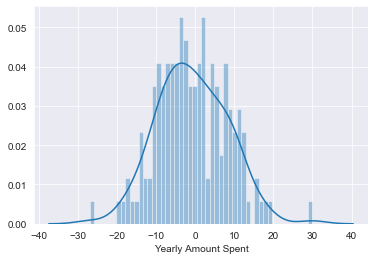

In [52]:
## Residuals 
sns.distplot((y_test-predictions),bins=50)

In [53]:
## Still we will want to figure it out the answer to original question 
##,do we need to focus on mobile application or website development, may be that does not even matter
## Membership time  is really required.lets interpreat the coeffcient
## Recreate the dataframe using coeffcient
cdf=pd.DataFrame(data=ln.coef_,index=X.columns,columns=['coeffcient'])


In [54]:
cdf

,coeffcient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


Conclusion: Lenght of membership is higher, then avg. session lenght then Time on app then time on Website. 
    based on above coeffcient , time on app is more than time on website.
    one way: Customer is more on app than website
    other way: improvement needed on website so that customers spend more time on website